In [ ]:
# import all required libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pandas as pd

In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


In [ ]:
# Data file name variables
train = basePath + "gd-train.dat"
test = basePath + "gd-test.dat"


In [ ]:
# Read the training and testing data files
def is_float(string):
    """ True if given string is float else False"""
    try:
        return float(string)
    except ValueError:
        return False

data = []
with open('gd-train.dat', 'r') as f:
    d = f.readlines()
    for j,i in enumerate(d):
        k = i.rstrip().split("\t")
        if j>1:
            data.append([float(i) if is_float(i) else i for i in k]) 

data = np.array(data, dtype='float32')
x=data[:,0:12]
y=data[:,13]

In [ ]:
# Read the training and testing data files
def is_float(string):
    """ True if given string is float else False"""
    try:
        return float(string)
    except ValueError:
        return False

data = []
with open('gd-test.dat', 'r') as f:
    d = f.readlines()
    for j,i in enumerate(d):
        k = i.rstrip().split("\t")
        if j>1 and j<400:
            k=[int(i) if is_float(i) else int(i) for i in k]
            data.append(k) 

data = np.array(data, dtype='float32')
test_x=data[:,0:12]
test_y=data[:,13]

In [ ]:
# Activation Function - implement Sigmoid
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    return x * (1 - x)
# given 'h' compute and return 'z' based on the activation function implemented


In [ ]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def train(trainX,trainY, learning_rate=0.01,threshold=0.5):
    print("[INFO] training...")
    W = np.random.randn(trainX.shape[1], 1)
    losses = []
    accuracy=[]
    for epoch in np.arange(0, 500):
    # initialize the total loss for the epoch
        epochLoss = []
        pred = []
        
        # loop over our data in batches
        for (batchX, batchY) in next_batch(trainX, trainY, 1):
            # take the dot product between our current batch of features
            # and the weight matrix, then pass this value through our
            # activation function
            preds = sigmoid_activation(batchX.dot(W))
            # now that we have our predictions, we need to determine the
            # "error", which is the difference between our predictions
            # and the true values
            error = preds - batchY
            preds[preds <= threshold] = 0
            preds[preds > threshold] = 1
            pred.append(preds[0].tolist())
            epochLoss.append(np.sum(error ** 2))
            d = error * sigmoid_deriv(preds)
            gradient = batchX.T.dot(d)
            # in the update stage, all we need to do is "nudge" the
            # weight matrix in the negative direction of the gradient
            # (hence the term "gradient descent" by taking a small step
            # towards a set of "more optimal" parameters
            W += learning_rate * gradient
        loss = np.average(epochLoss)
        losses.append(loss)
        accuracy.append(accuracy_score(trainY, pred))
        # check to see if an update should be displayed
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
                loss))
        
    return W,losses,accuracy
    
    
    
    # initialize weights to 0
    # go through each training data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
    # return the final learnt weights
    
    
def next_batch(X, y, batchSize):
    # loop over our dataset "X" in mini-batches, yielding a tuple of
    # the current batched data and labels
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])
        


In [ ]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value


def test(test_data,testY, weights, threshold=0.5):
    preds = sigmoid_activation(test_data.dot(weights))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= threshold] = 0
    preds[preds > threshold] = 1
    # return the predictions
    return accuracy_score(testY, preds)



    # go through each testing data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        # compare the normalized 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    # return the accuracy value for the given test dataset
    

In [ ]:
# Gradient Descent function
def gradient_descent(df_train,y, df_test,ytest, learning_rate=0.05, threshold=0.5):
    weights,losses,training_acc = train(df_train,y,learning_rate=learning_rate)
    test_acc=test(df_test,ytest,weights)
    # call the train function to train the model and obtain the weights
    # call the test function with the training dataset to obtain the training accuracy
    # call the test function with the testing dataset to obtain the testing accuracy
    return (training_acc, test_acc)


In [ ]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
trainacc,testacc=gradient_descent(x,y,test_x,test_y,threshold = 0.5)
print(trainacc[-1],testacc)

[INFO] training...
[INFO] epoch=1, loss=0.5295056
[INFO] epoch=5, loss=0.5295056
[INFO] epoch=10, loss=0.5295056
[INFO] epoch=15, loss=0.5295056
[INFO] epoch=20, loss=0.5295056
[INFO] epoch=25, loss=0.5295056
[INFO] epoch=30, loss=0.5295056
[INFO] epoch=35, loss=0.5295056
[INFO] epoch=40, loss=0.5295056
[INFO] epoch=45, loss=0.5295056
[INFO] epoch=50, loss=0.5295056
[INFO] epoch=55, loss=0.5295056
[INFO] epoch=60, loss=0.5295056
[INFO] epoch=65, loss=0.5295056
[INFO] epoch=70, loss=0.5295056
[INFO] epoch=75, loss=0.5295056
[INFO] epoch=80, loss=0.5295056
[INFO] epoch=85, loss=0.5295056
[INFO] epoch=90, loss=0.5295056
[INFO] epoch=95, loss=0.5295056
[INFO] epoch=100, loss=0.5295056
[INFO] epoch=105, loss=0.5295056
[INFO] epoch=110, loss=0.5295056
[INFO] epoch=115, loss=0.5295056
[INFO] epoch=120, loss=0.5295056
[INFO] epoch=125, loss=0.5295056
[INFO] epoch=130, loss=0.5295056
[INFO] epoch=135, loss=0.5295056
[INFO] epoch=140, loss=0.5295056
[INFO] epoch=145, loss=0.5295056
[INFO] epoch=

In [ ]:
# Main algorithm loop
# Loop through all the different learning rates [0.05, 1]
learning_rate=0.05
train_accuracy,test_accuracy,learningrate = [], [], []
for i in range(2000):
    learningrate.append(learning_rate)
    trainacc,testacc=gradient_descent(x,y,test_x,test_y,learning_rate=learning_rate,threshold = 0.5)
    print(trainacc[-1],testacc)
    train_accuracy.append(trainacc[-1])
    test_accuracy.append(testacc)
    learning_rate+=0.05
    
    if learning_rate >=1:
        break
    # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
    # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"


[INFO] training...
[INFO] epoch=1, loss=0.3178584
[INFO] epoch=5, loss=0.3178584
[INFO] epoch=10, loss=0.3178584
[INFO] epoch=15, loss=0.3178584
[INFO] epoch=20, loss=0.3178584
[INFO] epoch=25, loss=0.3178584
[INFO] epoch=30, loss=0.3178584
[INFO] epoch=35, loss=0.3178584
[INFO] epoch=40, loss=0.3178584
[INFO] epoch=45, loss=0.3178584
[INFO] epoch=50, loss=0.3178584
[INFO] epoch=55, loss=0.3178584
[INFO] epoch=60, loss=0.3178584
[INFO] epoch=65, loss=0.3178584
[INFO] epoch=70, loss=0.3178584
[INFO] epoch=75, loss=0.3178584
[INFO] epoch=80, loss=0.3178584
[INFO] epoch=85, loss=0.3178584
[INFO] epoch=90, loss=0.3178584
[INFO] epoch=95, loss=0.3178584
[INFO] epoch=100, loss=0.3178584
[INFO] epoch=105, loss=0.3178584
[INFO] epoch=110, loss=0.3178584
[INFO] epoch=115, loss=0.3178584
[INFO] epoch=120, loss=0.3178584
[INFO] epoch=125, loss=0.3178584
[INFO] epoch=130, loss=0.3178584
[INFO] epoch=135, loss=0.3178584
[INFO] epoch=140, loss=0.3178584
[INFO] epoch=145, loss=0.3178584
[INFO] epoch=

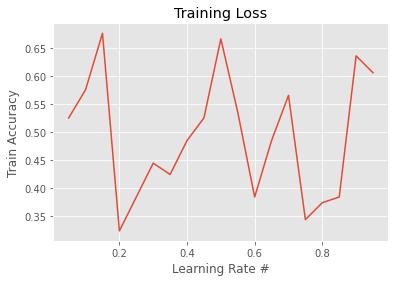

In [ ]:
# Plot the graphs for accuracy results.
# There will be 2 graphs - one for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05
    # Y-axis will be the accuracy values at the selected learning rate.
plt.style.use("ggplot")
plt.figure()
plt.plot(learningrate,train_accuracy)
plt.title("Training Loss")
plt.xlabel("Learning Rate #")
plt.ylabel("Train Accuracy")
plt.show()
